In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [21]:
homeless = pd.read_csv('homelesscorrelation.csv')

In [23]:
homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Total owed a prevention or relief duty                276 non-null    float64
 1   2020_people_per_sq_km                                 276 non-null    float64
 2   Income_deprivation_score_2019                         276 non-null    float64
 3   GDP_2019                                              276 non-null    float64
 4   median_earnings_2020                                  276 non-null    float64
 5   median_house_price_2020                               276 non-null    float64
 6   white                                                 276 non-null    float64
 7   Black / African / Caribbean / Black British: African  276 non-null    float64
 8   Asian/Asian_Britian                                   276 no

In [42]:
homeless.head()

,Total owed a prevention or relief duty,2020_people_per_sq_km,Income_deprivation_score_2019,GDP_2019,median_earnings_2020,median_house_price_2020,white,Black / African / Caribbean / Black British: African,Asian/Asian_Britian,Mixed / Multiple ethnic groups,Full-time\n work,Part-time\n work,Student / training,Registered unemployed,Not registered but seeking work,Not seeking work / at home,Not working due to long-term illness / disability,Retired
0,139.0000,"1,526.0000",0.1080,"21,789.0000","27,196.0000","317,250.0000",0.9200,0.0300,0.0000,0.0100,0.1583,0.1223,0.0000,0.2158,0.0288,0.1727,0.2806,0.0144
1,397.0000,485.0000,0.1090,"24,865.0000","28,285.0000","170,000.0000",0.9600,0.0200,0.0100,0.0100,0.0907,0.0856,0.0025,0.4232,0.0327,0.0756,0.2267,0.0151
2,578.0000,729.0000,0.1040,"18,389.0000","25,208.0000","282,000.0000",0.9500,0.0100,0.0100,0.0100,0.1142,0.1142,0.0052,0.3045,0.0311,0.0761,0.2682,0.0277
3,348.0000,"1,171.0000",0.1520,"25,506.0000","27,374.0000","143,000.0000",0.9200,0.0100,0.0100,0.0000,0.1322,0.1207,0.0029,0.4828,0.0029,0.0603,0.0862,0.0201
4,562.0000,226.0000,0.1100,"28,532.0000","28,754.0000","280,000.0000",0.8700,0.0400,0.0100,0.0200,0.1085,0.1370,0.0178,0.3737,0.0445,0.1032,0.1103,0.0249


Text(0.5, 1.0, 'Correlation Matrix')

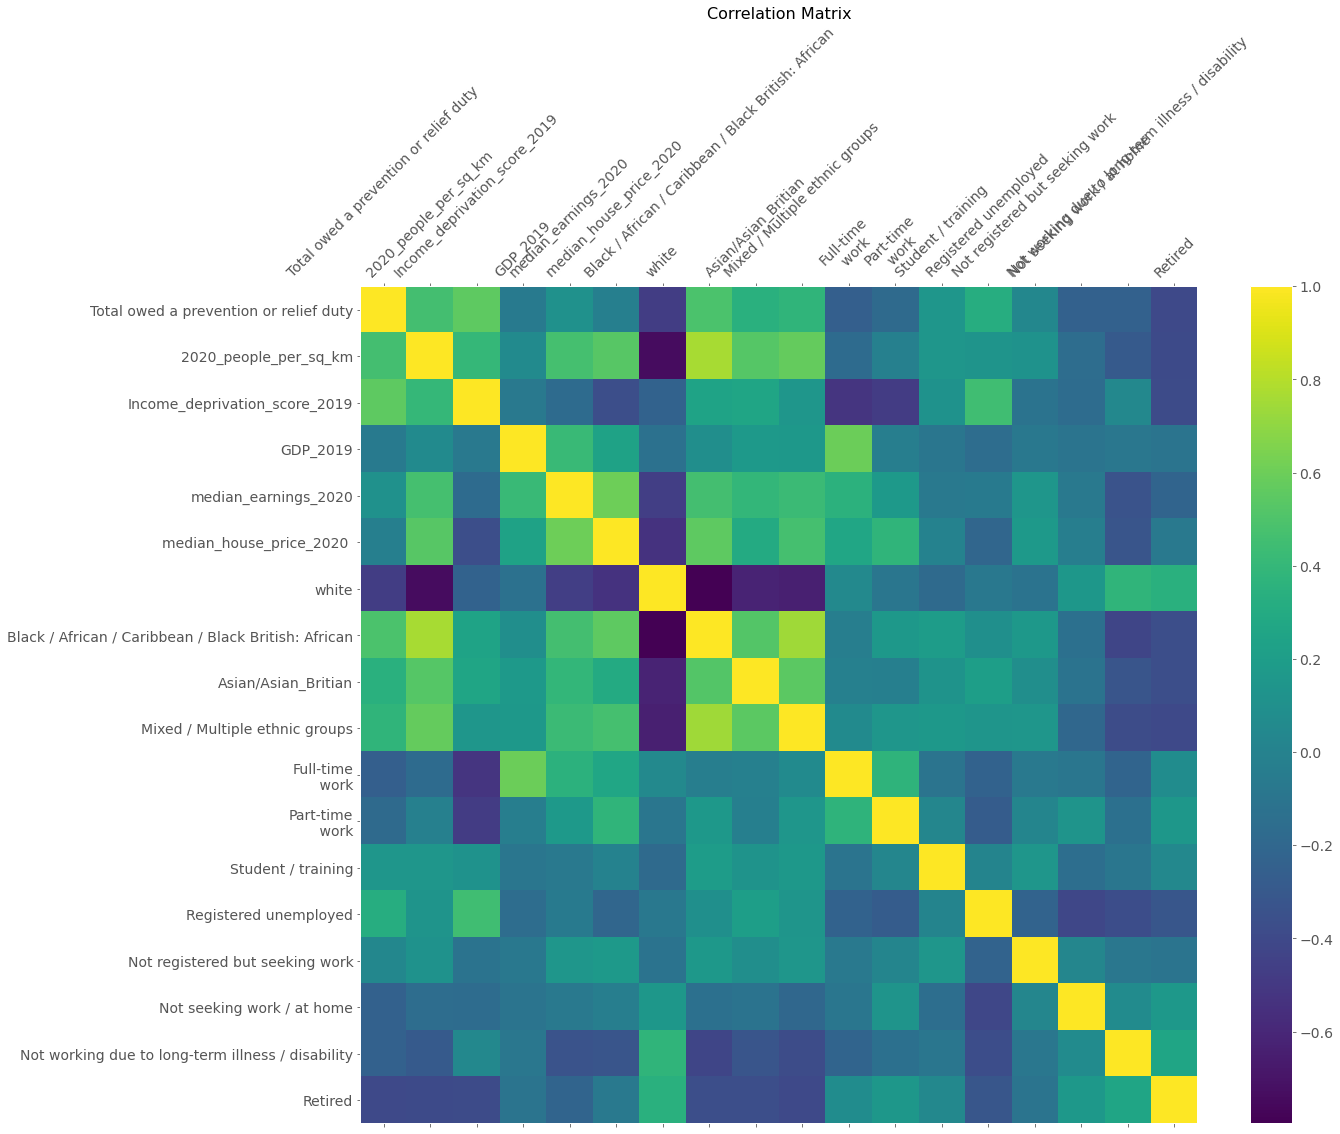

In [24]:
df = homeless
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

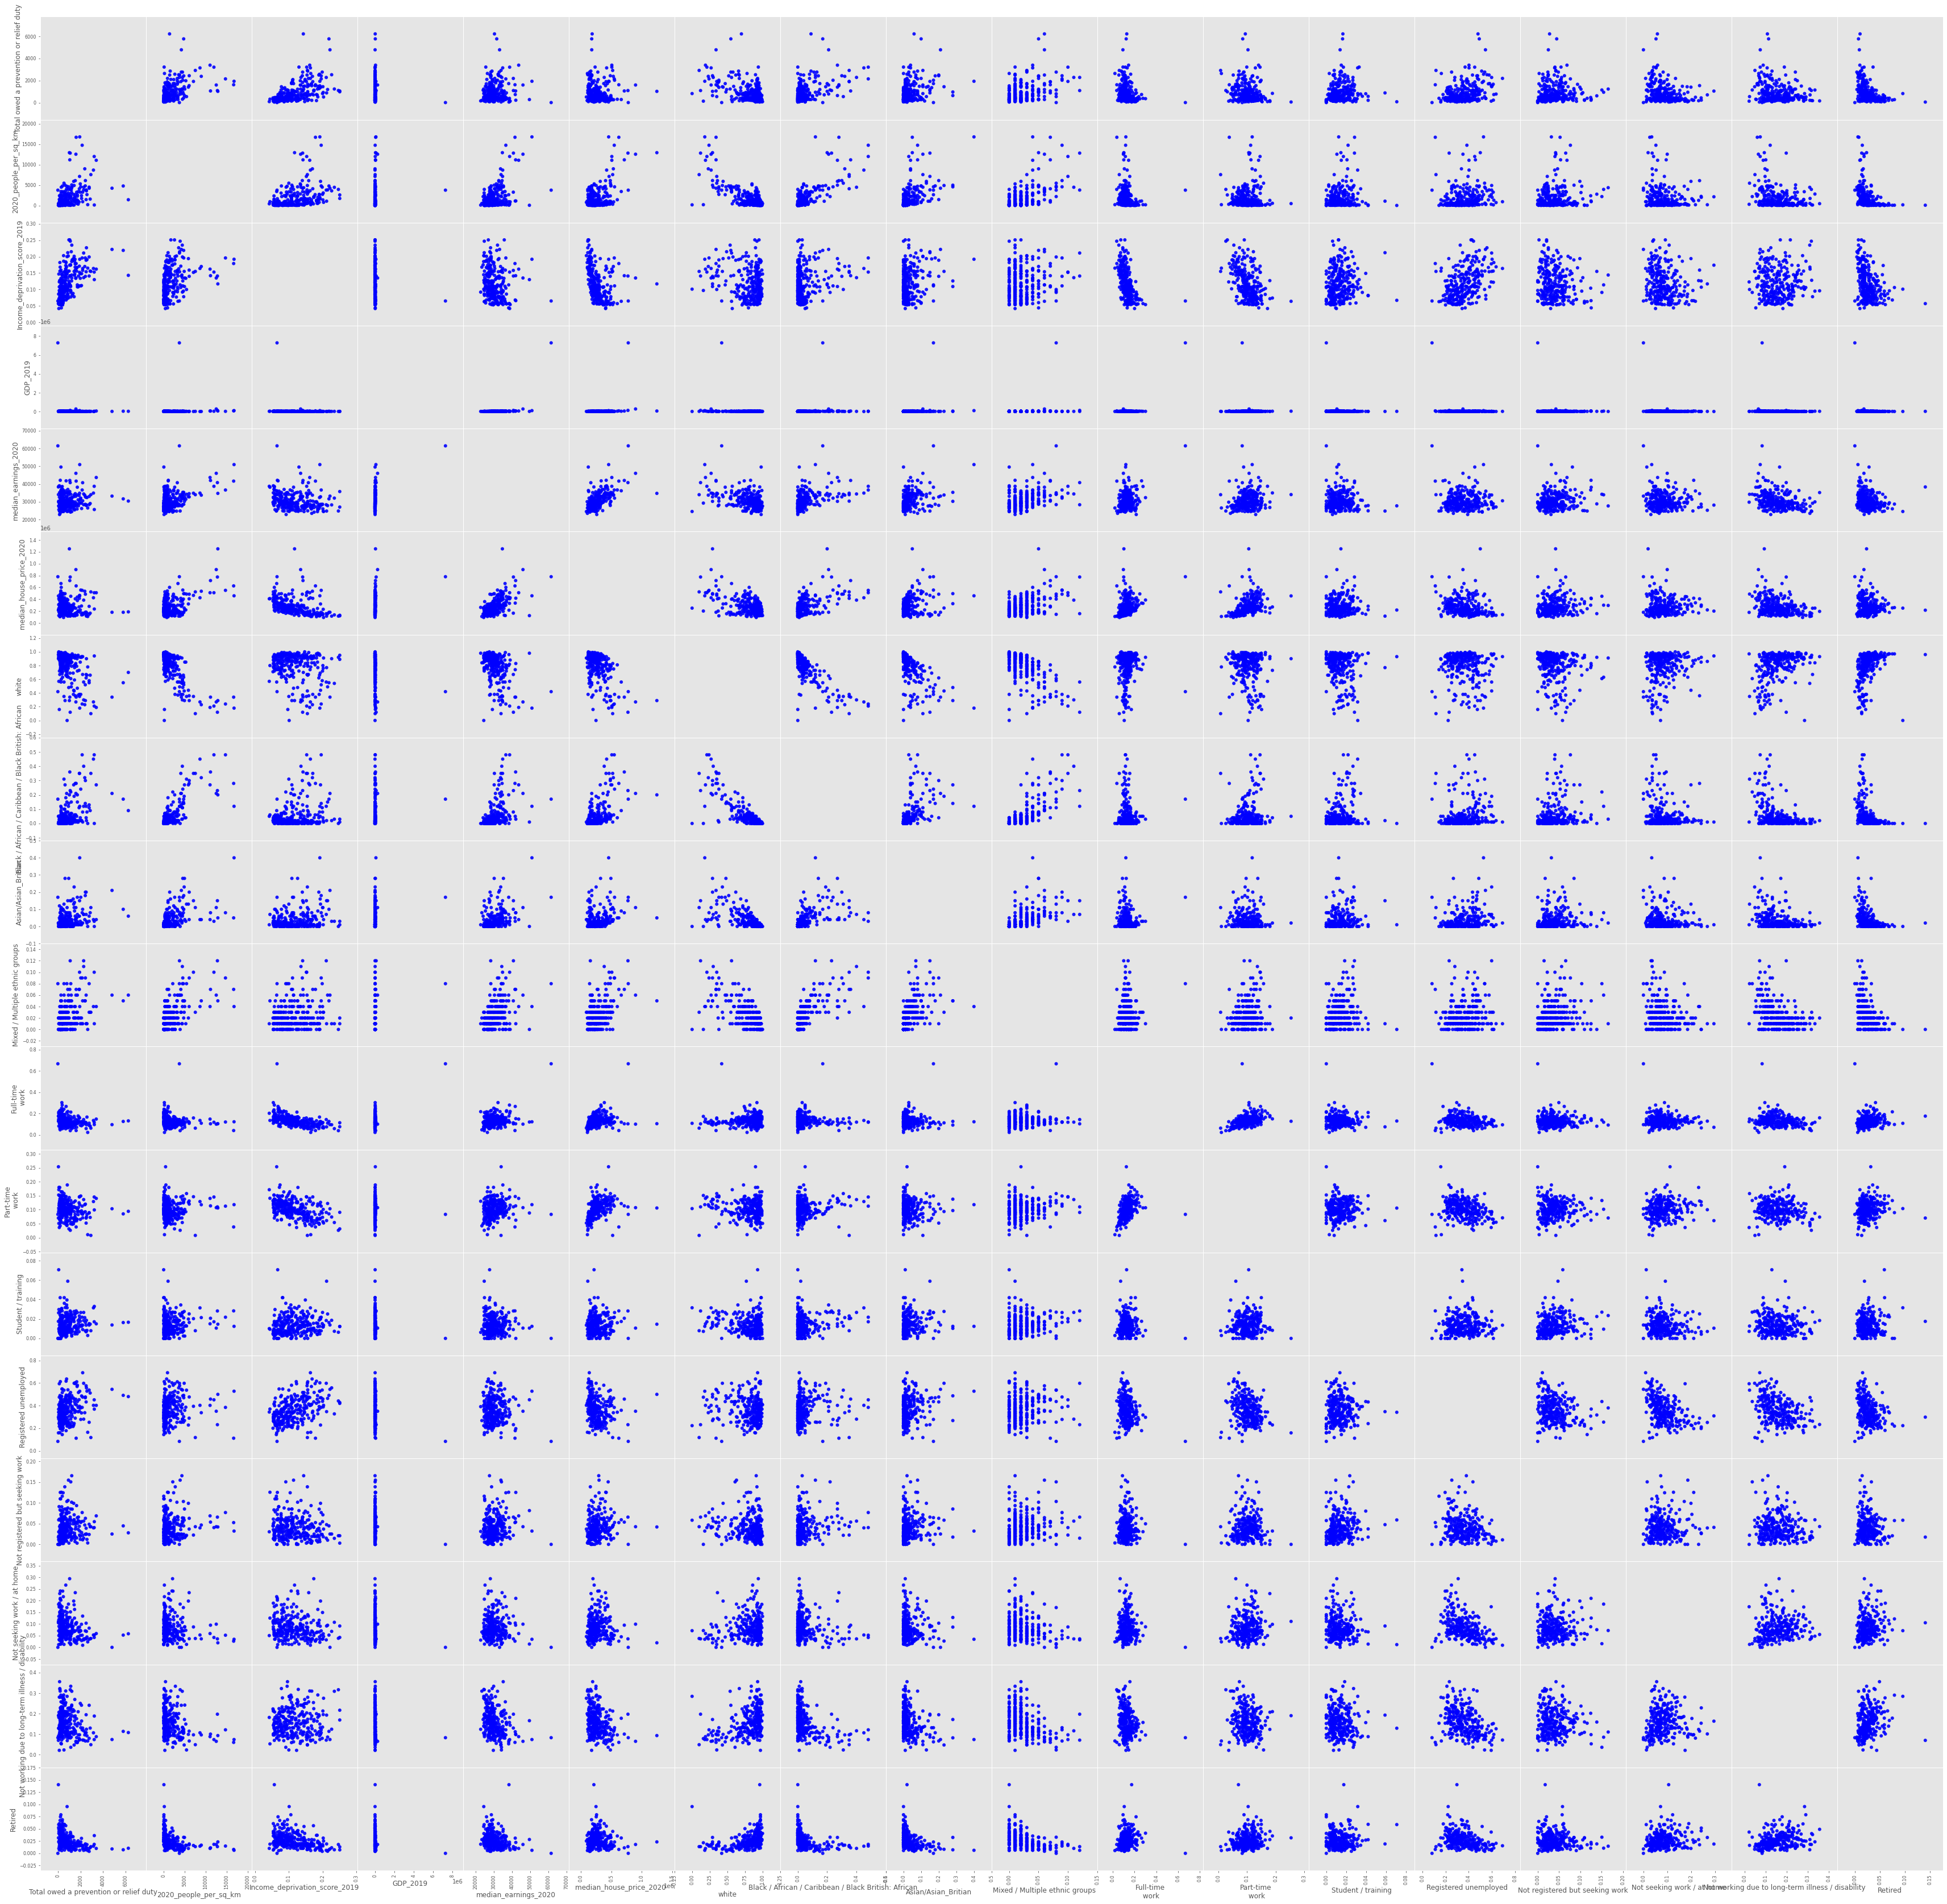

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


fig = pd.plotting.scatter_matrix(homeless,figsize=(60,60),c ='blue',marker = 'o',diagonal='',alpha =0.9,range_padding=0.5)  # diagonal只能为'hist'/'kde'
plt.show()

In [27]:
homeless.corr()

,Total owed a prevention or relief duty,2020_people_per_sq_km,Income_deprivation_score_2019,GDP_2019,median_earnings_2020,median_house_price_2020,white,Black / African / Caribbean / Black British: African,Asian/Asian_Britian,Mixed / Multiple ethnic groups,Full-time\n work,Part-time\n work,Student / training,Registered unemployed,Not registered but seeking work,Not seeking work / at home,Not working due to long-term illness / disability,Retired
Total owed a prevention or relief duty,1.0000,0.4606,0.5510,-0.0567,0.1094,-0.0217,-0.4674,0.4901,0.3411,0.3813,-0.2504,-0.1774,0.1486,0.3207,0.0342,-0.2414,-0.2406,-0.4017
2020_people_per_sq_km,0.4606,1.0000,0.4025,0.0656,0.4712,0.5315,-0.7383,0.7636,0.5286,0.5783,-0.1720,-0.0155,0.1461,0.1316,0.1174,-0.1551,-0.2893,-0.3898
Income_deprivation_score_2019,0.5510,0.4025,1.0000,-0.0734,-0.1703,-0.3619,-0.2352,0.2444,0.2572,0.1440,-0.5186,-0.4799,0.1157,0.4462,-0.1132,-0.1589,0.0453,-0.3828
GDP_2019,-0.0567,0.0656,-0.0734,1.0000,0.4190,0.2386,-0.1260,0.0906,0.1651,0.1612,0.5967,-0.0299,-0.0883,-0.1531,-0.0793,-0.1058,-0.0809,-0.1071
median_earnings_2020,0.1094,0.4712,-0.1703,0.4190,1.0000,0.6051,-0.4650,0.4628,0.3914,0.4263,0.3581,0.1721,-0.0685,-0.0545,0.1451,-0.0709,-0.3402,-0.2159
median_house_price_2020,-0.0217,0.5315,-0.3619,0.2386,0.6051,1.0000,-0.5304,0.5533,0.3030,0.4694,0.2668,0.3811,0.0016,-0.2013,0.1658,-0.0251,-0.3196,-0.0680
white,-0.4674,-0.7383,-0.2352,-0.1260,-0.4650,-0.5304,1.0000,-0.7967,-0.6202,-0.6415,0.0487,-0.0934,-0.1752,-0.0792,-0.1093,0.1545,0.3814,0.3473
Black / African / Caribbean / Black British: African,0.4901,0.7636,0.2444,0.0906,0.4628,0.5533,-0.7967,1.0000,0.5226,0.7415,-0.0314,0.1594,0.1936,0.0998,0.1638,-0.1367,-0.4192,-0.3657
Asian/Asian_Britian,0.3411,0.5286,0.2572,0.1651,0.3914,0.3030,-0.6202,0.5226,1.0000,0.5507,-0.0114,-0.0224,0.1230,0.2107,0.0890,-0.1144,-0.3251,-0.3634
Mixed / Multiple ethnic groups,0.3813,0.5783,0.1440,0.1612,0.4263,0.4694,-0.6415,0.7415,0.5507,1.0000,0.0623,0.1486,0.1585,0.1369,0.1454,-0.1953,-0.3792,-0.3980
